<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/si_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

### **Parameters**

In [2]:
p = jnp.array([.48, .46, .06])
n = 3385

### **Sample Mean**

In [3]:
def sample_mean(n, candidate, key):
  votes = jax.random.choice(key, a=jnp.array([0, 1, 2]), p=p, shape=(n,))
  return jnp.mean(votes==candidate)

In [4]:
print(f"Fraction voting for Kamala: {sample_mean(3385, 0, jax.random.PRNGKey(0)):.3f}")
print(f"Fraction voting for Trump: {sample_mean(3385, 1, jax.random.PRNGKey(0)):.3f}")
print(f"Fraction voting for Other: {sample_mean(3385, 2, jax.random.PRNGKey(0)):.3f}")

Fraction voting for Kamala: 0.483
Fraction voting for Trump: 0.456
Fraction voting for Other: 0.061


### **Simulate Sample Mean**

In [17]:
f = partial(sample_mean, 3385, 0)
keys = jax.random.split(jax.random.PRNGKey(0), 10000)
results = jax.vmap(f)(keys)

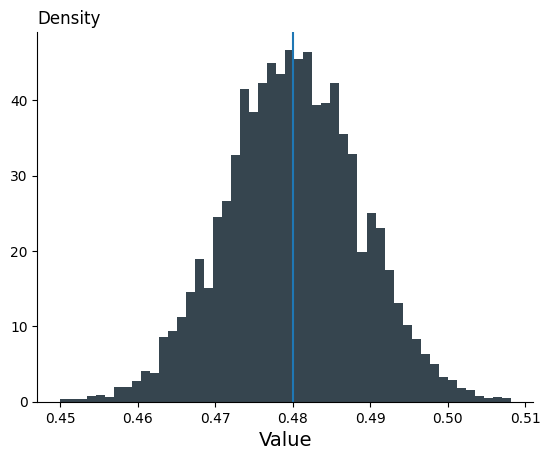

In [16]:
plt.hist(results, bins=50, density=True, color="#36454F")
plt.axvline(jnp.mean(results))
plt.title('Density', loc='left')
plt.xlabel("Value", size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [27]:
def normalized_sample_mean(n, candidate, key):
  numerator = sample_mean(n, candidate, key) - p[candidate]
  denominator = jnp.sqrt(p[candidate]*(1-p[candidate])) / jnp.sqrt(n)
  return numerator/ denominator

In [57]:
f = partial(normalized_sample_mean, 1000, 0)
keys = jax.random.split(jax.random.PRNGKey(0), 50000)
results = jax.vmap(f)(keys)

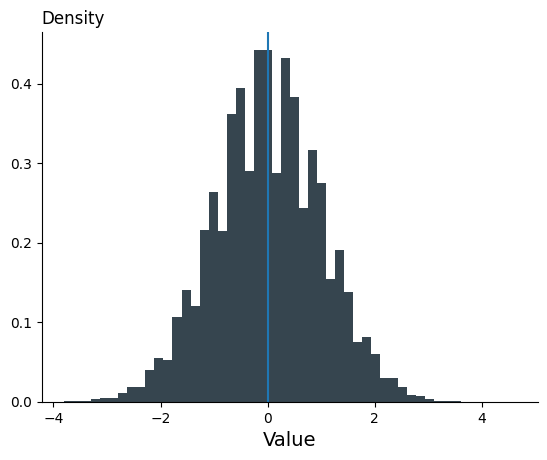

In [58]:
plt.hist(results, bins=50, density=True, color="#36454F")
plt.axvline(jnp.mean(results))
plt.title('Density', loc='left')
plt.xlabel("Value", size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

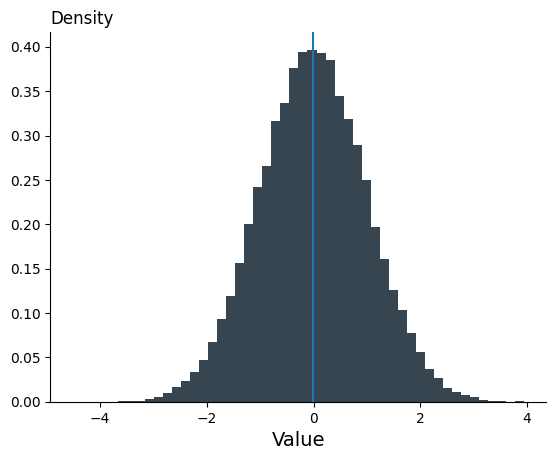

In [41]:
results = jax.random.normal(jax.random.PRNGKey(0), shape=(50000,))
plt.hist(results, bins=50, density=True, color="#36454F")
plt.axvline(jnp.mean(results))
plt.title('Density', loc='left')
plt.xlabel("Value", size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()